In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

<Axes: xlabel='skill_counts', ylabel='skill_pay'>

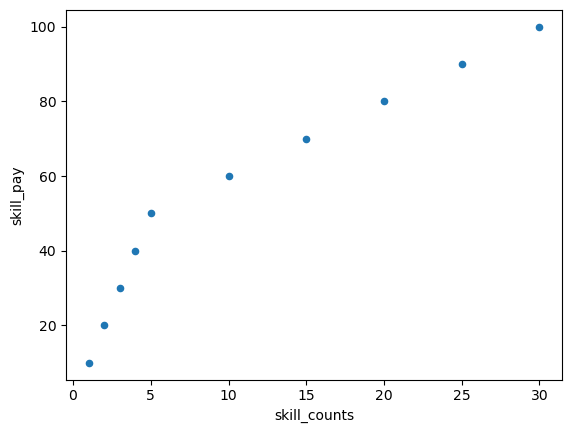

In [3]:
data = {
    'job_skills': ['python', 'sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
    'skill_counts': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}

df = pd.DataFrame(data)

df.plot(kind='scatter',x='skill_counts', y='skill_pay')

In [4]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df = df[df['job_title_short'] == 'Data Analyst']

In [12]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

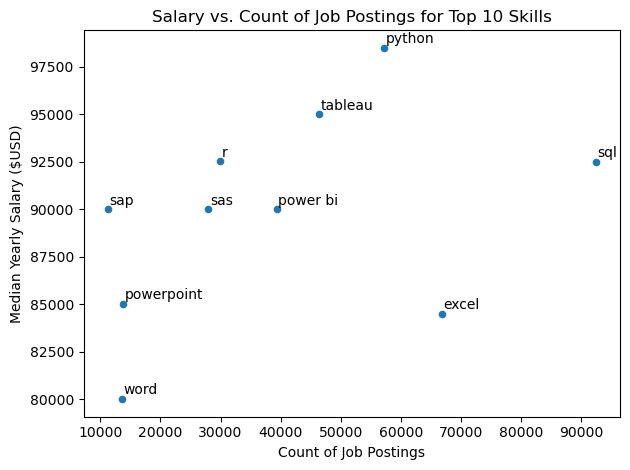

In [20]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i]+250, skill_stats['median_salary'].iloc[i]+250, txt)

plt.tight_layout()
plt.show()